In [2]:
import numpy as np
from nm_lib import nm_lib as nm
import threading

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Operator splitting 

## 1- OS precision

Solve the following Burgers' equation: 

$$\frac{\partial u}{\partial t} = - a \frac{\partial u}{\partial x} - b \frac{\partial u}{\partial x}   \tag{1}$$

following exersize [2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb). where $x[x_0, x_f]$ with $x_0 = −2.6$, $x_f = 2.6$, $a=-0.7$ and $b=-0.3$, periodic boundary conditions and with initial condition:

$$u(x,t=t_0) = \cos^2 \left(\frac{6 \pi x}{5} \right) / \cosh(5x^2)  \tag{2}$$

Solve the evolution for the following four different approaches: 

- 1 With additive OS.  

- 2 With Lie-Trotter OS. 

- 3 With Strang OS.

- 4 Without an operator splitting and single time-step method but add the to terms: 

$$\frac{\partial u}{\partial t} = - (a+b) \frac{\partial u}{\partial x}$$

for $nump=256$ and 100 steps.

_Suggestion_: use the Lax-method scheme for all cases with `deriv_cent`. Make sure the boundaries are properly selected.

Fill in the function `osp_LL_Add`, `osp_LL_Lie`, and `osp_LL_Strang`.

Start with $cfl\_cut = 0.4$ and increase up to $0.9$.  

Which OS schemes are stable? Which one is more diffusive? Why?

In [4]:
def u(x):
    return (np.cos(6*np.pi*x/5))**2 / np.cosh(5*x*x)

In [5]:
x0 = -2.6
xf = 2.6
#number of x-points
nump = 256
#number of t-points
nt = 100
#xgrid
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh = u(xx)

a = -0.7
b = -0.3

In [6]:
tt, unnt_Add = nm.ops_Lax_LL_Add(xx, hh, nt, a, b, cfl_cut = 0.4)
tt, unnt_Lie = nm.ops_Lax_LL_Lie(xx, hh, nt, a, b, cfl_cut = 0.4)
tt, unnt_Strang = nm.ops_Lax_LL_Strang(xx, hh, nt, a, b, cfl_cut = 0.4)

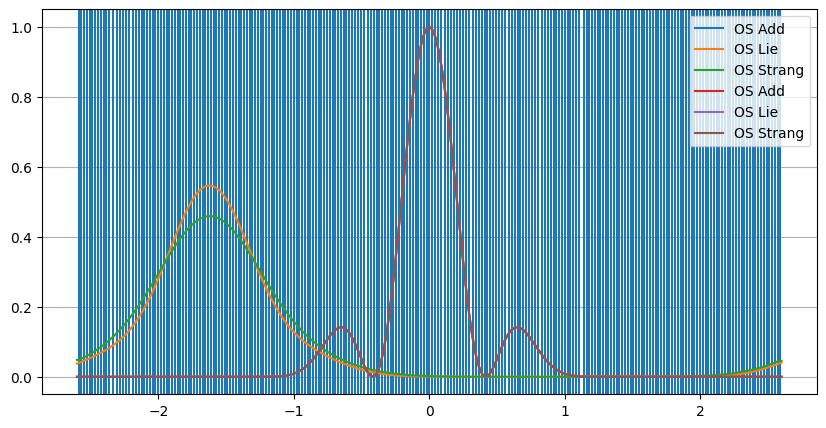

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
def init(): 
    axes.plot(xx,unnt_Add[0,:], label="OS Add")
    axes.plot(xx,unnt_Lie[0,:], label="OS Lie")
    axes.plot(xx,unnt_Strang[0,:], label="OS Strang")
    axes.legend()
    axes.set_ylim(-0.05, 1.05)
    axes.grid(True)

def animate(i):
    axes.clear()
    axes.plot(xx,unnt_Add[i,:], label="OS Add")
    axes.plot(xx,unnt_Lie[i,:], label="OS Lie")
    axes.plot(xx,unnt_Strang[i,:], label="OS Strang")

    #axes.set_title('t={:.2f}, i={:g}'.format(tt[i],i))
    axes.grid(True)
    axes.legend()
    axes.set_ylim(-0.05, 1.05)
    
anim = FuncAnimation(fig, animate, interval=50, frames=nt, init_func=init)
HTML(anim.to_jshtml())

## 2- When does it not work? 

Use OS-Strang from the previous exercise and try to apply a predictor-corrector explicit method. 
To facilitate this exercise, `nm_lib` already includes the predictor-corrector Hyman method, which is included Bifrost (`Hyman`). Fill in the function `osp_Lax_LH_Strang`. Use the same setup as the previous exercise but with $nump=512$, $500$ steps, and $cfl\_cut=0.8$. 

What do you notice? 

__Optional__: Apply the Hyman predictor-corrector explicit method to the Burgers equation and check if the following is true: 

$$u^{n+1} = F\, u^{n}\Delta t \approx G\, u^{n}\Delta t+H\, u^{n}\Delta t$$